<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Multiple Linear Regression to Calibrate PAR Buddy

##### Copyright 2022 Margaret Johnson.
__Please send feedback to happyday.github@gmail.com__

MIT License

Copyright (c) 2022 Margaret Johnson

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Hello and Welcome!

[More detail on the PAR Buddy Project](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md)

I'm exploring using an as7341 as a PAR meter.  Based on what I read in the article, [_A Novel Approach to Obtain PAR with a Multi-Channel Spectral Microsensor, Suitable for Sensor Node Integration_](https://pubmed.ncbi.nlm.nih.gov/34068029/), I thought I'd try using multiple linear regression.

An Apogee mq-500 PAR meter was used as the "ground truth" (dependent variable) for PPFD readings.  The relationship was then determined using the readings from the 8 visible channels of the AS7341 as the independent variables.


# The Challenge



Is there a strong enough relationship between the 8 channel samples of visible light made by the AS7341 enclosed in [PAR Buddy](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md#what-is-par-buddy):
1. 415nm
2. 445nm
3. 480nm
4. 515nm
5. 555nm
6. 590nm
7. 630nm
8. 680nm

<img src="https://bceye.com/wp-content/uploads/2019/07/Depositphotos_229295576_l-2015.jpg" height="300" />

and samples of PPFD made by an Apogee mq-500 PAR meter to use a multiple linear regression model to predict/determine the PPFD using just PAR Buddy?



# The Tools


Use [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) to figure out the coefficients for each of the color bands.:

$$ PAR = b_0 + \sum_{i=1}^{n=8} (b_ix_i) + \epsilon $$

Three LED light systems were used:
-     - [MAXSISUN PB1000 Pro Grow Light](https://amzn.to/3uKqPy5) (the "white" LEDs)
    - [Advanced Platinum Series P300 300w](https://amzn.to/3sBnTRR) (the "burple" LEDs)
    -  "burple red" LEDs - the lights I have have two settings, veg and bloom.  The bloom has noticeably more red lights.

[Details on sampling](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md#taking-samples)

# Conclusions


|dataframe|# Samples|RMSE|r2|
|---------|------|------|----|
|readings|173|92.8|0.94|
|readings_white|74|16.9|0.996|
|readings_burple|43|46.7|0.95|
|readings_burple_red|56|85.3|0.81|

My (naive) observation/thoughts:
- For all dataframes, the r2 value shows there is a strong enough linear dependency between the PAR_Buddy readings and the PPFD value of the mq-500 PAR meter.
- The number of samples was inconsistent across the dataframes.  This is where "I don't know" comes in how significant this is.  My thought is there are enough samples for each LED system to be statistically significant.
- While the readings dataframe showed a high r2 of 94%, I feel most comfortable calibrating each LED system with only data taken from that LED system.



## Samples
173 samples were taken using [the method described in the PAR Buddy documentation](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md#taking-samples).  These were based on readings over three lighting systems:
- ["white" LEDs](https://amzn.to/3uKqPy5) - these have more of a full spectrum visible light. 74 readings were taken.  Their values are in the `readings_white` dataframe.
- ["burple" LEDs](https://amzn.to/3sBnTRR) - the blue/red mix that has lost favor with the indoor growing community. 43 readings were taken.  Their values are in the `readings_burple` dataframe.
- "burple red" LEDs - the lights I have have two settings, veg and bloom.  The bloom has noticeably more red lights. 56 readings were taken.  There values are in the `readings_burple` dataframe.

Results were investigation on:
- readings (a dataframe containing all samples)
- readings_white
- readings_burple
- readings_burple_red

## Results

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA
There were multiple sampling runs.  Each run was saved within a file and stored in the [Growbuddy github repo](https://github.com/solarslurpi/GrowBuddy/tree/main/data).

There are three LED settings:
- ["white" LEDs](https://amzn.to/3uKqPy5) - these have more of a full spectrum visible light.
- ["burple" LEDs](https://amzn.to/3sBnTRR) - the blue/red mix that has lost favor.
- "burple red" LEDs - the lights I have have two settings, veg and bloom.  The bloom has noticeably more red lights.



In [32]:
# Load readings from "white" LEDs
readings_white1 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02052022.csv')
readings_white2 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02092022.csv')
readings_white3 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02142022.csv')
readings_white = pd.concat([readings_white1,readings_white2,readings_white3],sort=False,ignore_index=True)
readings_white.head()


,PPFD,415,445,480,515,555,590,630,680
0,40,60,282,274,438,659,859,953,465
1,59,86,404,387,624,939,1219,1357,663
2,88,127,599,563,919,1384,1791,1998,977
3,117,170,803,743,1225,1847,2383,2662,1304
4,144,209,984,902,1495,2254,2901,3240,1591


In [3]:
# Load readings from "burple" veg mode LEDs
readings_burple1 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_02072022.csv')
readings_burple2 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_02112022.csv')
readings_burple = pd.concat([readings_burple1,readings_burple2],sort=False,ignore_index=True)
readings_burple.head()

,PPFD,415,445,480,515,555,590,630,680
0,230,699,2150,1101,428,369,797,3418,3049
1,211,651,1795,1058,491,408,935,3759,3368
2,190,496,1496,902,400,349,797,3468,3116
3,182,369,1281,718,301,266,584,2664,2343
4,145,323,1039,606,265,235,508,2374,2175


In [4]:
# Load readings from "burple_red" flower mode LEDs
readings_burple_red = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_red_02132022.csv')
readings_burple_red.head()

,PPFD,415,445,480,515,555,590,630,680
0,1053,1168,1126,1125,1123,1360,5668,40679,27271
1,976,1049,1007,1006,1005,1215,5034,36034,24629
2,1052,1002,963,951,953,1152,4562,33352,23542
3,1101,1155,1105,1106,1097,1347,5456,39162,27073
4,1103,1020,989,993,973,1204,4981,35239,23940


In [5]:
readings = pd.concat([readings_burple,readings_burple_red,readings_white],sort=False,ignore_index=True)
readings.head()

,PPFD,415,445,480,515,555,590,630,680
0,230,699,2150,1101,428,369,797,3418,3049
1,211,651,1795,1058,491,408,935,3759,3368
2,190,496,1496,902,400,349,797,3468,3116
3,182,369,1281,718,301,266,584,2664,2343
4,145,323,1039,606,265,235,508,2374,2175


# Visualize Data

In [6]:
readings_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    74 non-null     int64
 1   415     74 non-null     int64
 2   445     74 non-null     int64
 3   480     74 non-null     int64
 4   515     74 non-null     int64
 5   555     74 non-null     int64
 6   590     74 non-null     int64
 7   630     74 non-null     int64
 8   680     74 non-null     int64
dtypes: int64(9)
memory usage: 5.3 KB


In [7]:
readings_burple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    43 non-null     int64
 1   415     43 non-null     int64
 2   445     43 non-null     int64
 3   480     43 non-null     int64
 4   515     43 non-null     int64
 5   555     43 non-null     int64
 6   590     43 non-null     int64
 7   630     43 non-null     int64
 8   680     43 non-null     int64
dtypes: int64(9)
memory usage: 3.1 KB


In [8]:
readings_burple_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    56 non-null     int64
 1   415     56 non-null     int64
 2   445     56 non-null     int64
 3   480     56 non-null     int64
 4   515     56 non-null     int64
 5   555     56 non-null     int64
 6   590     56 non-null     int64
 7   630     56 non-null     int64
 8   680     56 non-null     int64
dtypes: int64(9)
memory usage: 4.1 KB


In [9]:
readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    173 non-null    int64
 1   415     173 non-null    int64
 2   445     173 non-null    int64
 3   480     173 non-null    int64
 4   515     173 non-null    int64
 5   555     173 non-null    int64
 6   590     173 non-null    int64
 7   630     173 non-null    int64
 8   680     173 non-null    int64
dtypes: int64(9)
memory usage: 12.3 KB


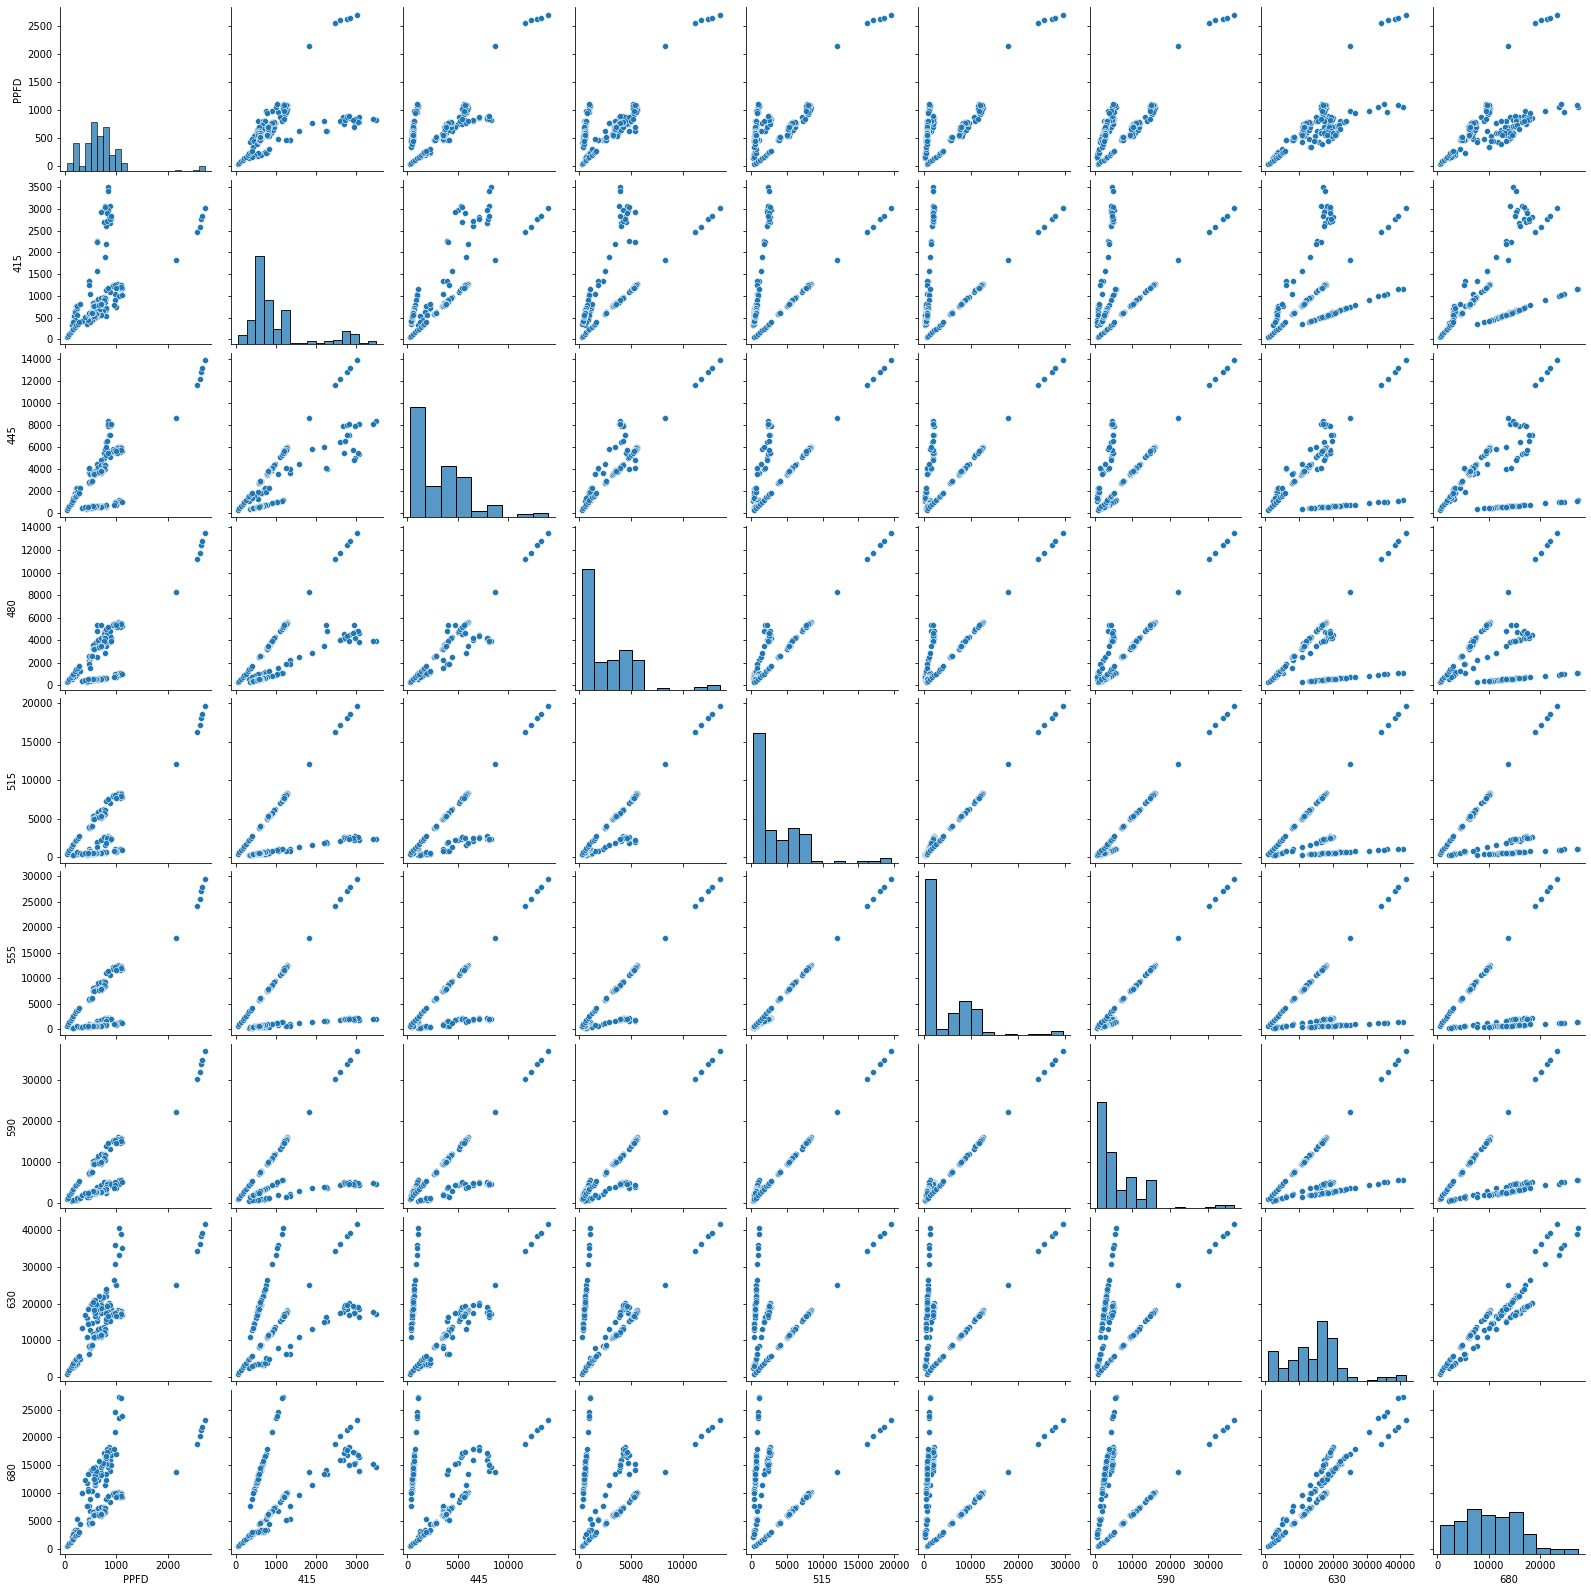

In [10]:
import seaborn as sns
sns.pairplot(readings)

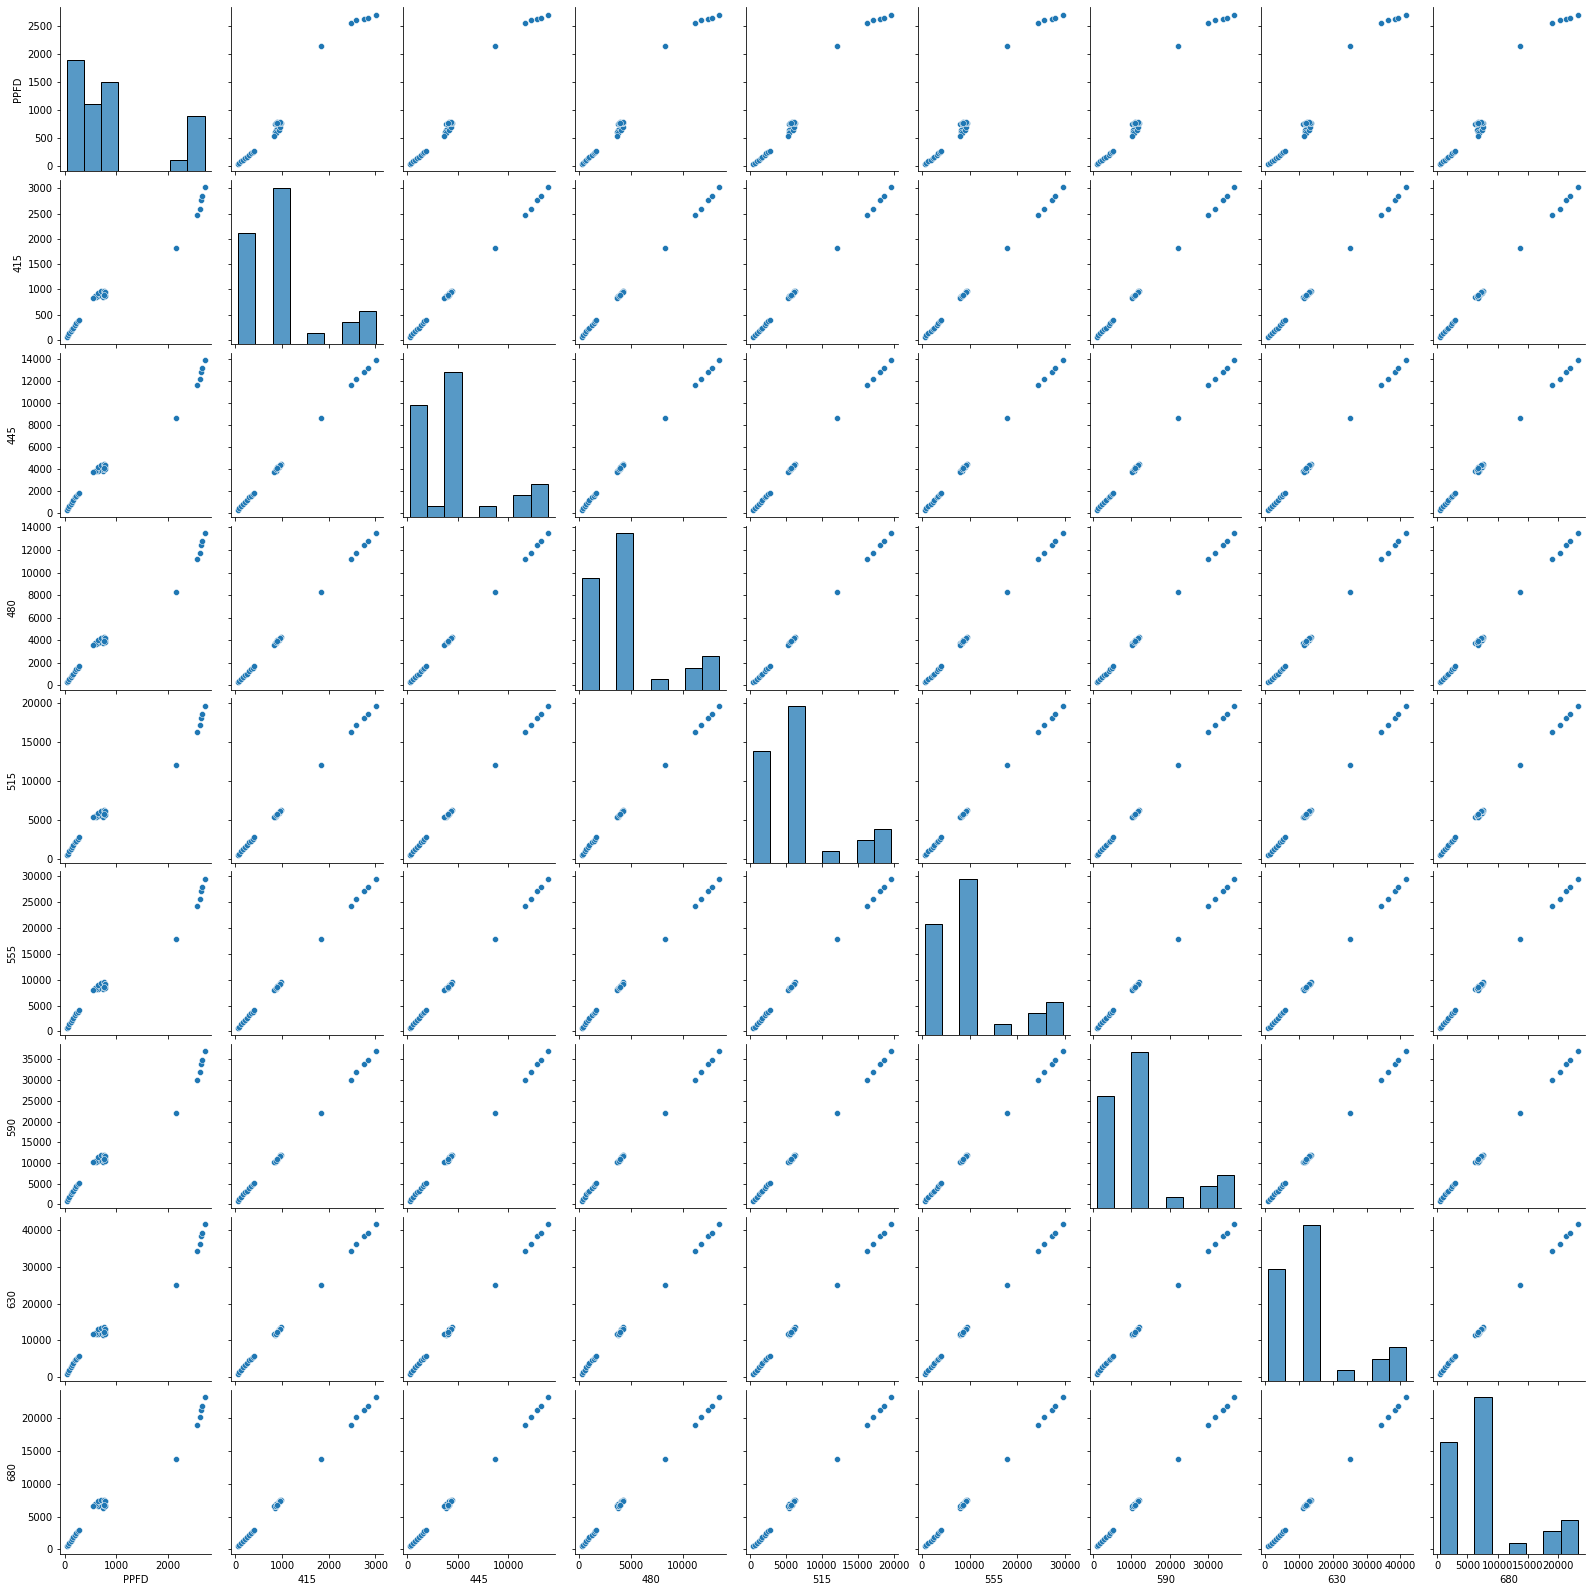

In [ ]:
sns.pairplot(readings_white)

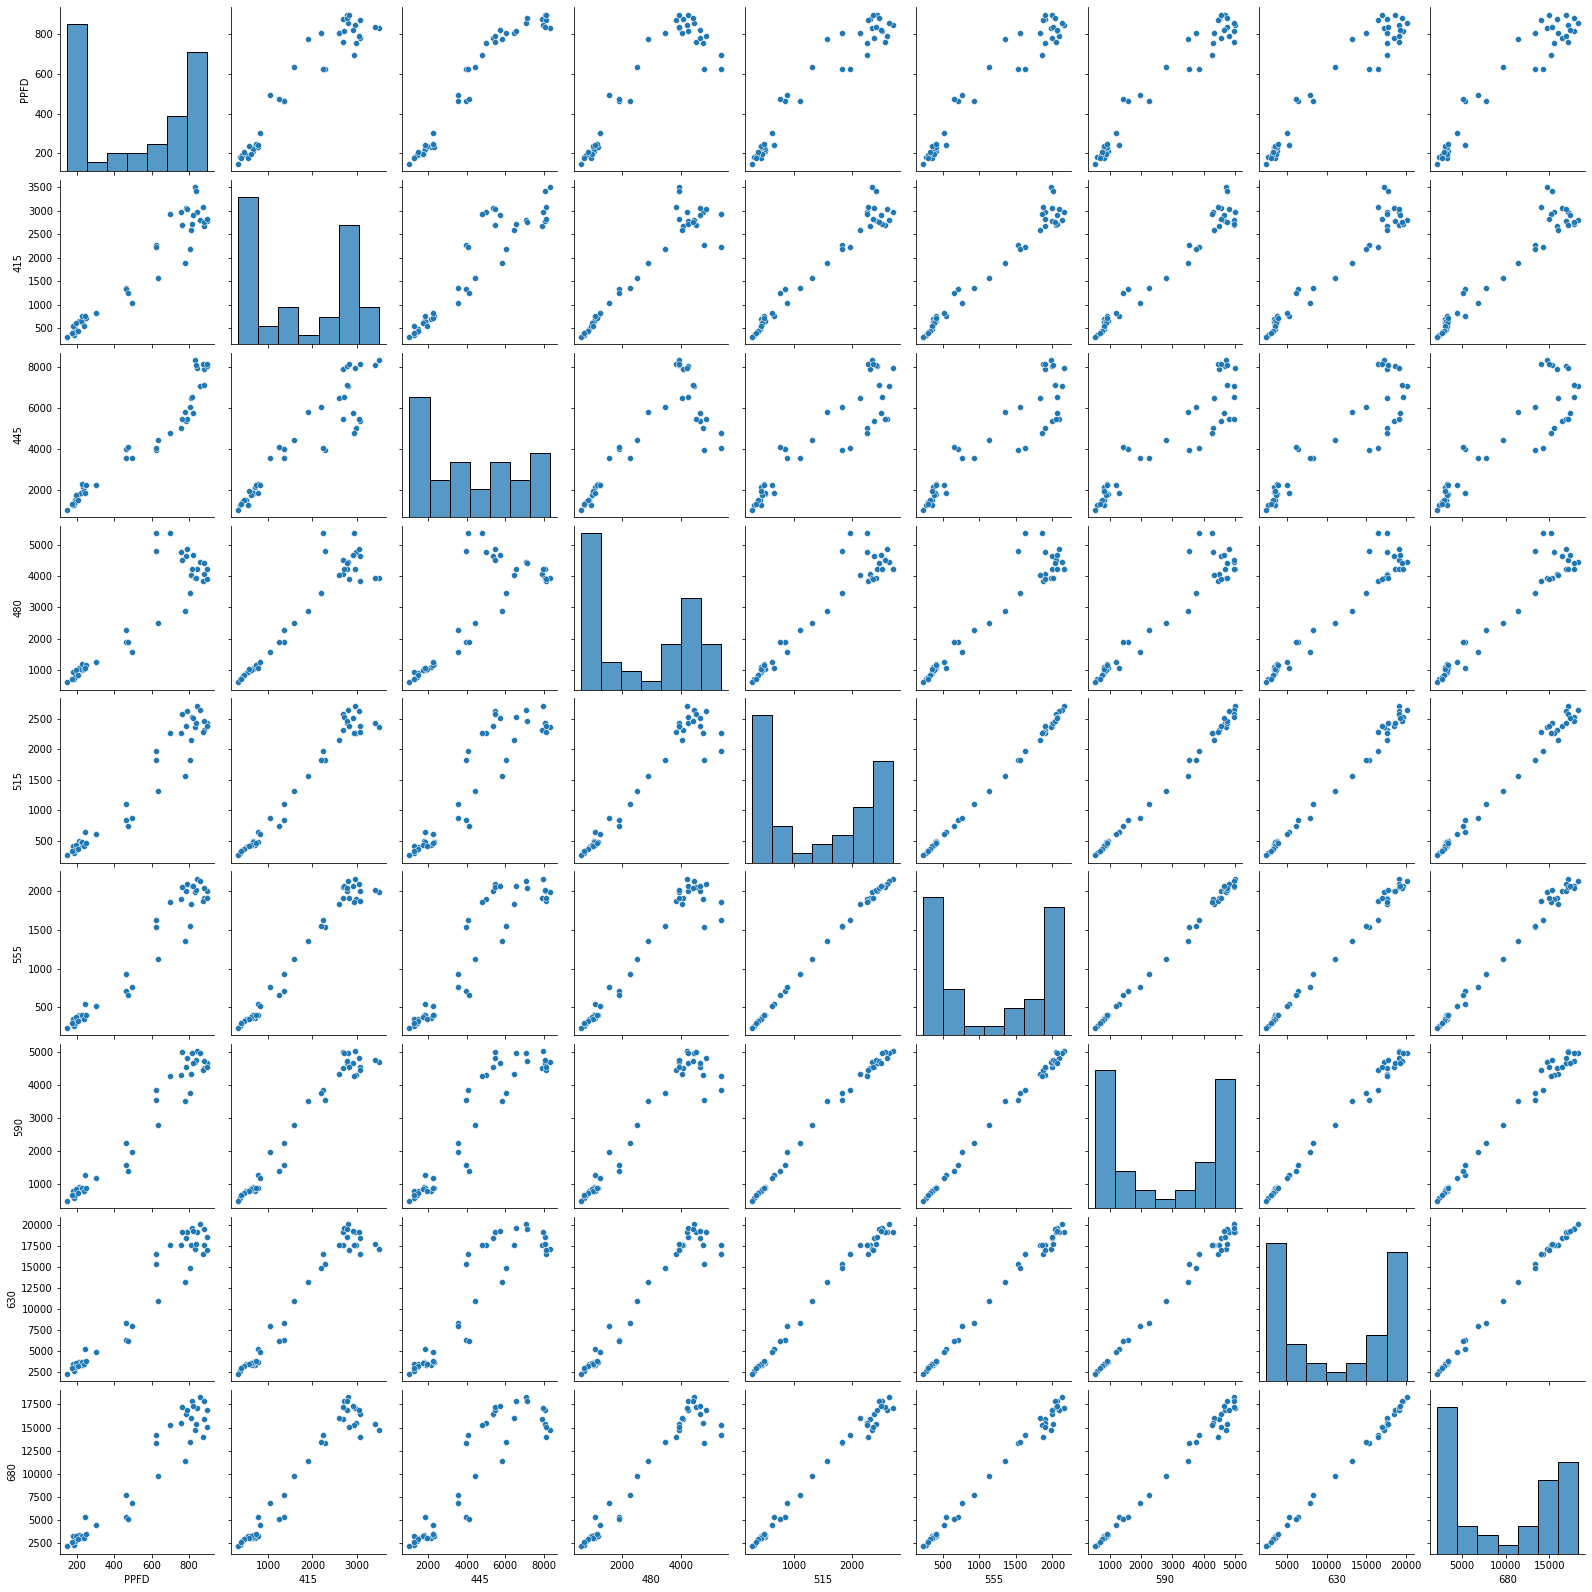

In [ ]:
sns.pairplot(readings_burple)

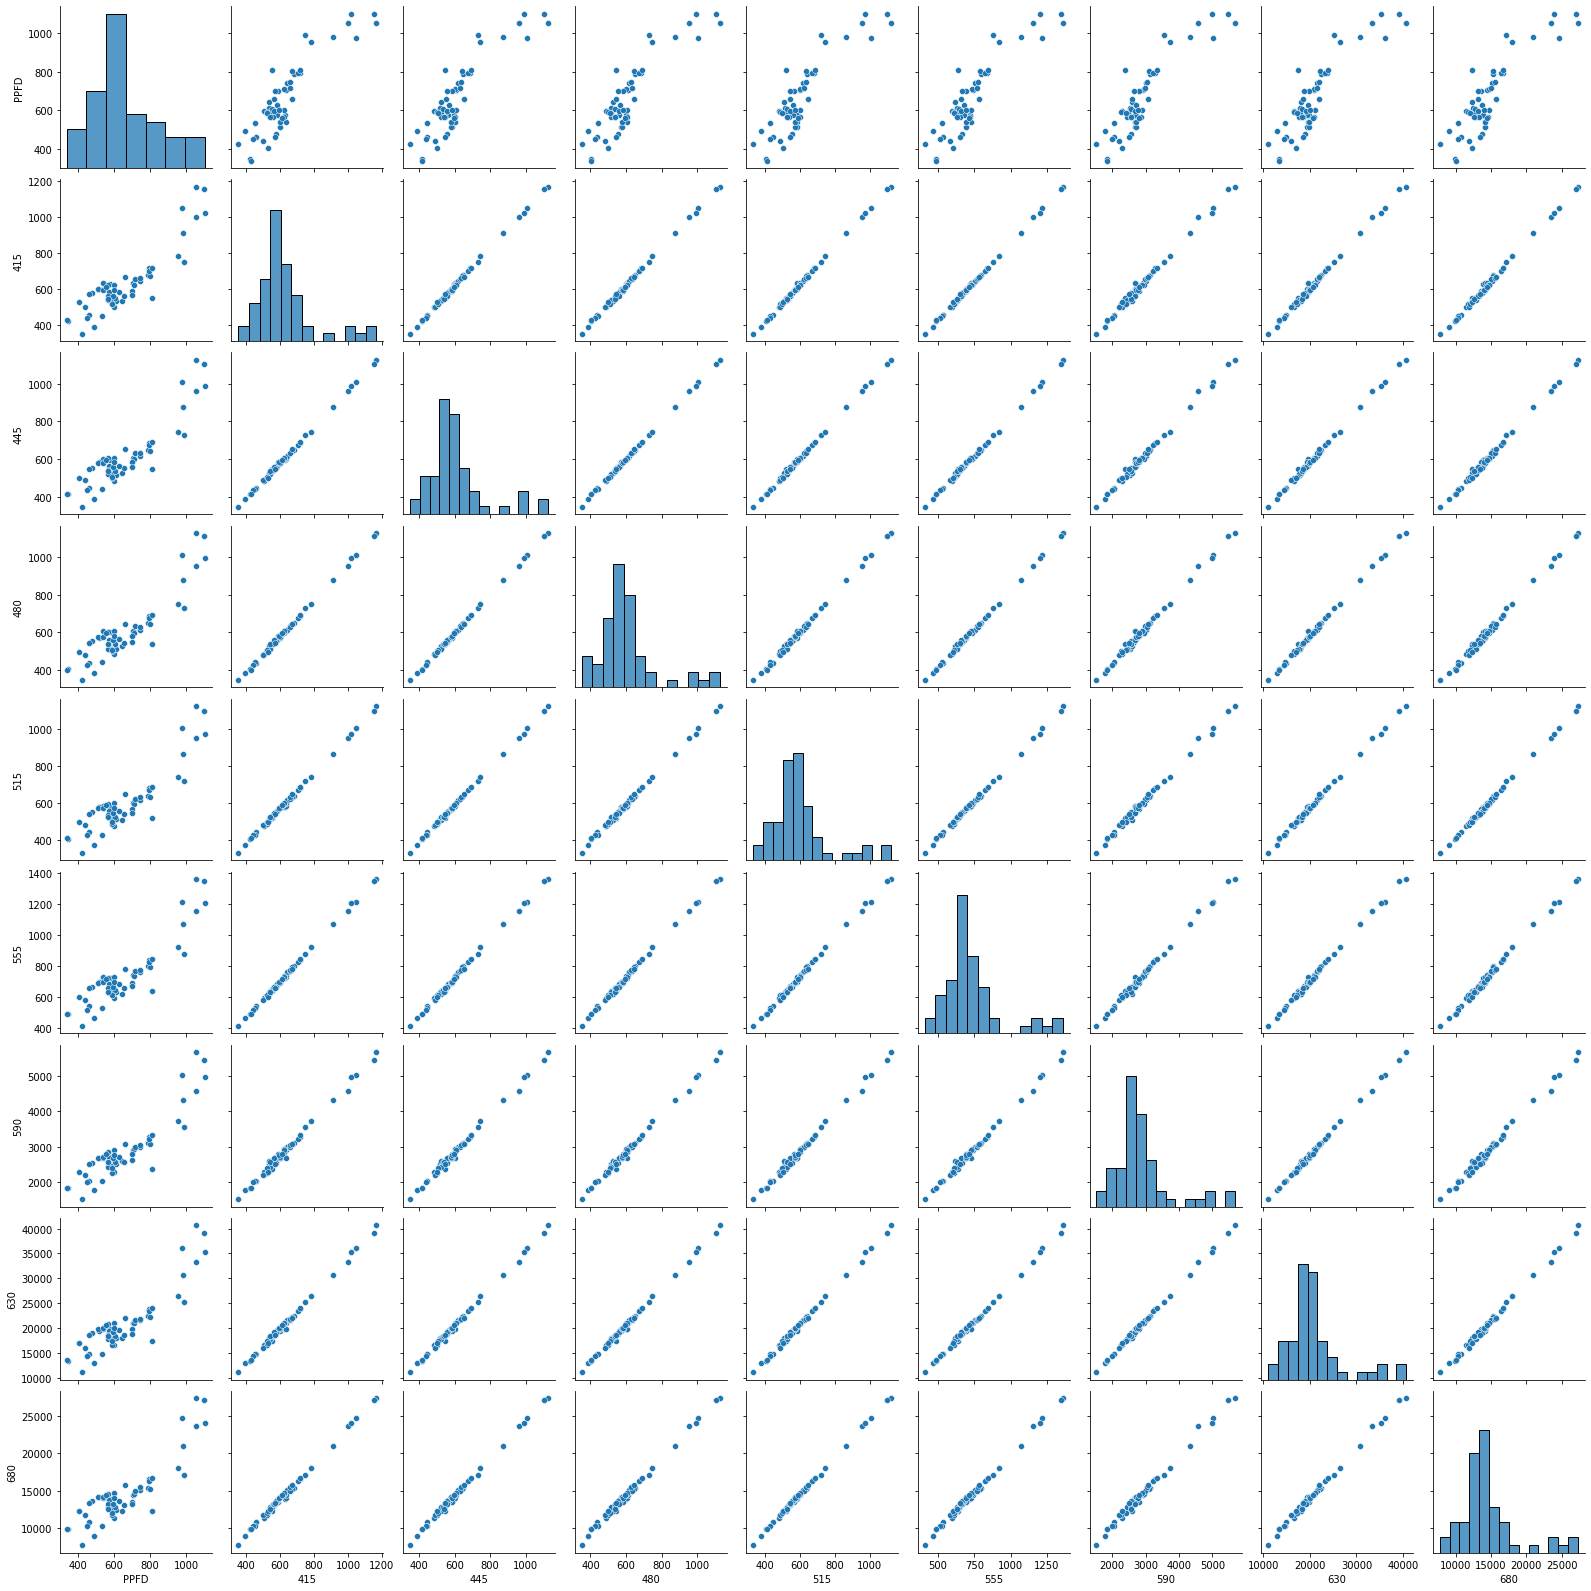

In [ ]:
sns.pairplot(readings_burple_red)

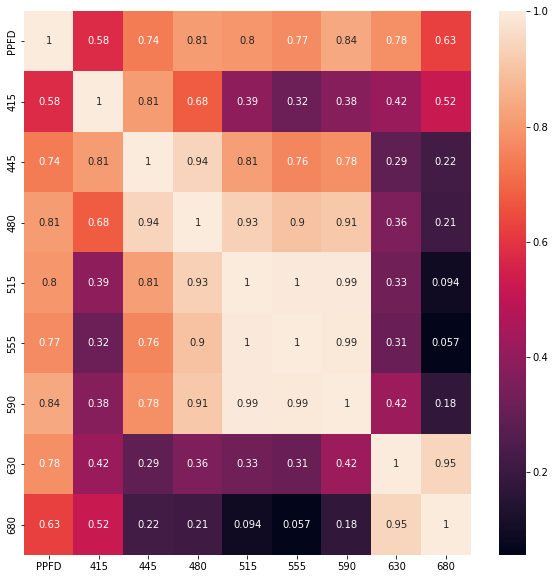

In [15]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(readings.corr(),annot=True)

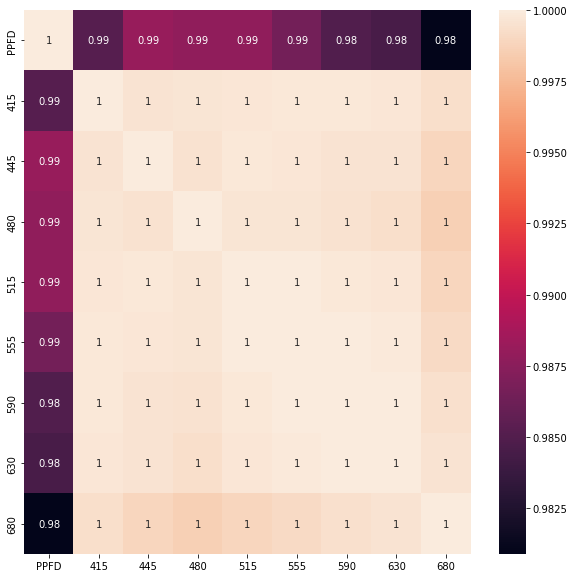

In [16]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(readings_white.corr(),annot=True)

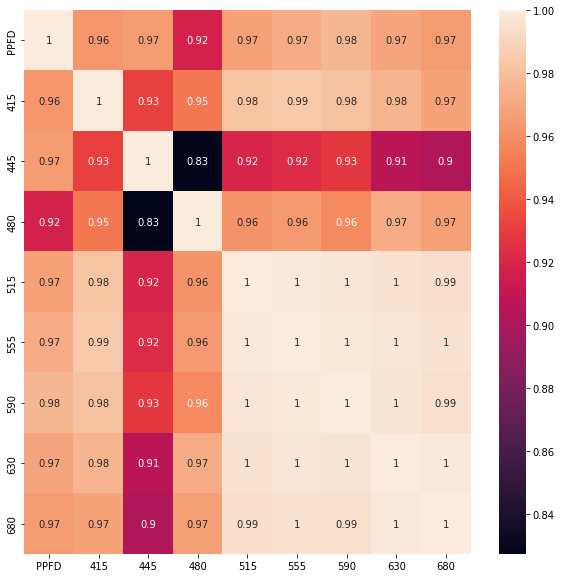

In [17]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(readings_burple.corr(),annot=True)

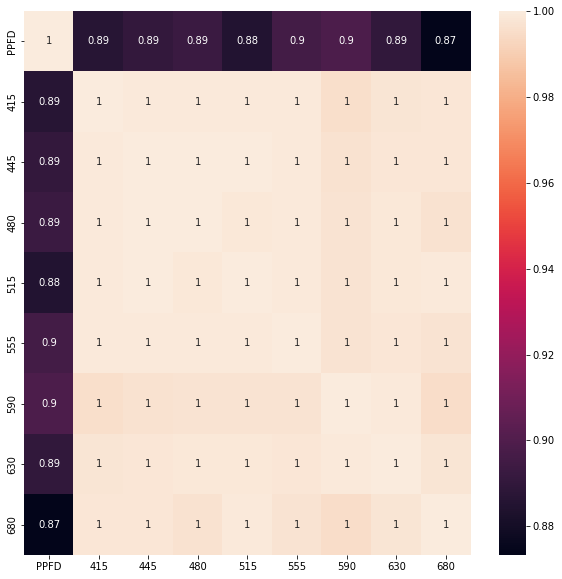

In [18]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(readings_burple_red.corr(),annot=True)

# Get Multiple Linear Regression Results for Each DataFrame

## readings

### CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [94]:
y = readings['PPFD']
y.head()

0    230
1    211
2    190
3    182
4    145
Name: PPFD, dtype: int64

In [95]:
x = readings.iloc[:,1:]
x.head()

,415,445,480,515,555,590,630,680
0,699,2150,1101,428,369,797,3418,3049
1,651,1795,1058,491,408,935,3759,3368
2,496,1496,902,400,349,797,3468,3116
3,369,1281,718,301,266,584,2664,2343
4,323,1039,606,265,235,508,2374,2175


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [97]:
print(f"There are {len(x_train)+len(x_test)} total samples. {len(x_train)} samples are in the training set and {len(x_test)} samples are in the test set.")

There are 173 total samples. 138 samples are in the training set and 35 samples are in the test set.


### TRAIN MODEL

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model=LinearRegression(fit_intercept=True)

In [100]:
model.fit(x_train,y_train)

LinearRegression()

In [101]:
print('linear model coefficients (m)',model.coef_)
print('linear model coefficients (b)',model.intercept_)

linear model coefficients (m) [-0.11469066  0.11514113  0.02703384  0.506647    0.4844443  -0.75820386
  0.16686024 -0.0885744 ]
linear model coefficients (b) -15.783534724736


### EVALUATE MODEL

In [102]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[ 666.24736203  540.60370654  602.6918156   662.08607509 1006.11285186
 1057.53541582  609.84731928 1021.0490494   823.42069869  486.64228761
  737.15565934  733.47314865 1069.05189517  489.39662056  730.32047601
 2562.05211099  355.84442058  467.13647892 1076.18240904  163.17457279
  263.69532968  616.80641825  964.68455362  660.51412346  661.92229635
  522.18160391  708.15767619  359.85235479  843.49272433  898.56980327
  541.29251903  961.43683688  550.49301812 2566.79637992  405.88283829]
23      624
130     521
98      459
72      658
162     888
166    1089
89      477
164    1005
51      956
41      777
150     704
142     716
154    1089
138     477
149     704
126    2638
40      495
69      440
168    1039
16      243
10      236
33      761
50      980
111     646
57      705
129     499
22      758
65      425
35      836
165     838
135     521
158     944
64      588
127    2619
87      337
Name: PPFD, dtype: int64


Text(0.5, 1.0, 'PPFD Predictions')

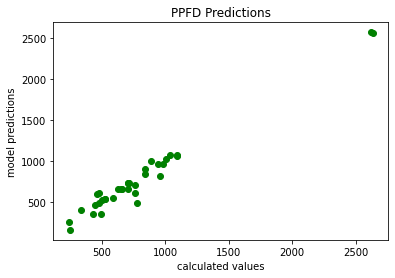

In [103]:
plt.scatter(y_test,y_predict,color='g')
plt.ylabel('model predictions')
plt.xlabel('calculated values')
plt.title('PPFD Predictions')

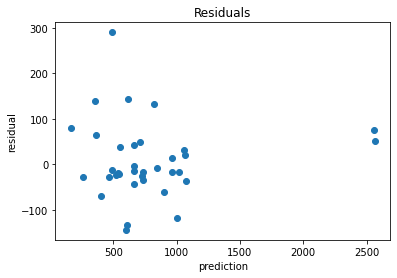

In [104]:
residuals = y_test-y_predict
plt.title('Residuals')
plt.ylabel('residual')
plt.xlabel('prediction')
plt.scatter(y_predict,residuals)

plt.show()

In [105]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
# r2 is the percentage of dependent variable variation that the (linear) model explains. 0% means there is
# no relationship. 100% means a perfect relationship.
r2 = r2_score(y_test,y_predict)
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# It tells you how concentrated the data is around the line of best fit.
# RMSE units is the same as PPFD units, so they are easy to interpret.
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3F'))


k = x_test.shape[1]
n = len(x_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/y_test) ) * 1000
print('RMSE = ',RMSE,'\nr2 = ',r2)

RMSE =  82.511 
r2 =  0.9734469857413242


## readings_white

### CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [78]:
y = readings_white['PPFD']
y.head()

0     40
1     59
2     88
3    117
4    144
Name: PPFD, dtype: int64

In [79]:
x = readings_white.iloc[:,1:]
x.head()

,415,445,480,515,555,590,630,680
0,60,282,274,438,659,859,953,465
1,86,404,387,624,939,1219,1357,663
2,127,599,563,919,1384,1791,1998,977
3,170,803,743,1225,1847,2383,2662,1304
4,209,984,902,1495,2254,2901,3240,1591


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [81]:
print(f"There are {len(x_train)+len(x_test)} total samples. {len(x_train)} samples are in the training set and {len(x_test)} samples are in the test set.")

There are 74 total samples. 59 samples are in the training set and 15 samples are in the test set.


### TRAIN MODEL

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression(fit_intercept=True)

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
print('linear model coefficients (m)',model.coef_)
print('linear model coefficients (b)',model.intercept_)

linear model coefficients (m) [-2.3564544   0.20260651  0.2631843   0.95924037  0.22472303 -0.40249983
 -0.2047317   0.06305214]
linear model coefficients (b) 2.489988293760348


### EVALUATE MODEL

In [43]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[1022.68453852  582.65596556  793.18412348 1064.14558633  128.33171491
  244.6083664   698.20589797  689.98560098  933.87880649 1097.52950119
  725.09265348  478.82449528  548.52388242  544.57066768  484.18810958]
54    1035
14     593
21     775
55    1089
3      117
7      230
52     673
42     701
58     948
72    1091
51     704
39     477
41     527
36     521
38     468
Name: PPFD, dtype: int64


Text(0.5, 1.0, 'PPFD Predictions')

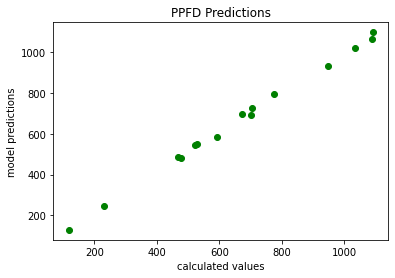

In [44]:
plt.scatter(y_test,y_predict,color='g')
plt.ylabel('model predictions')
plt.xlabel('calculated values')
plt.title('PPFD Predictions')

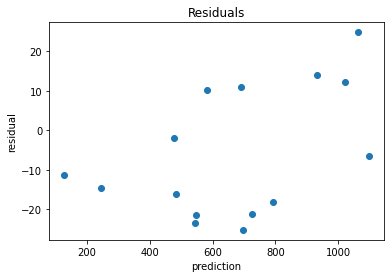

In [45]:
residuals = y_test-y_predict
plt.title('Residuals')
plt.ylabel('residual')
plt.xlabel('prediction')
plt.scatter(y_predict,residuals)

plt.show()

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
# r2 is the percentage of dependent variable variation that the (linear) model explains. 0% means there is
# no relationship. 100% means a perfect relationship.
r2 = r2_score(y_test,y_predict)
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# It tells you how concentrated the data is around the line of best fit.
# RMSE units is the same as PPFD units, so they are easy to interpret.
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3F'))


k = x_test.shape[1]
n = len(x_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/y_test) ) * 1000
print('RMSE = ',RMSE,'\nr2 = ',r2)

RMSE =  16.885 
r2 =  0.9964414721637033


## readings_burple

### CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [106]:
y = readings_burple['PPFD']
y.head()

0    230
1    211
2    190
3    182
4    145
Name: PPFD, dtype: int64

In [107]:
x = readings_burple.iloc[:,1:]
x.head()

,415,445,480,515,555,590,630,680
0,699,2150,1101,428,369,797,3418,3049
1,651,1795,1058,491,408,935,3759,3368
2,496,1496,902,400,349,797,3468,3116
3,369,1281,718,301,266,584,2664,2343
4,323,1039,606,265,235,508,2374,2175


In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [109]:
print(f"There are {len(x_train)+len(x_test)} total samples. {len(x_train)} samples are in the training set and {len(x_test)} samples are in the test set.")

There are 43 total samples. 34 samples are in the training set and 9 samples are in the test set.


### TRAIN MODEL

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model=LinearRegression(fit_intercept=True)

In [57]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
print('linear model coefficients (m)',model.coef_)
print('linear model coefficients (b)',model.intercept_)

linear model coefficients (m) [-0.16059175  0.0661893   0.02075567 -0.73778745  1.07851149  0.04976486
  0.04303126 -0.0401788 ]
linear model coefficients (b) 27.84370851964303


### EVALUATE MODEL

In [59]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[590.61919497 216.68097095 846.88313168 708.59105261 480.91931433
 743.42216525 418.59375633 708.07488648 848.09627238]
39    636
5     225
34    819
22    758
40    495
25    783
19    475
31    791
38    898
Name: PPFD, dtype: int64


Text(0.5, 1.0, 'PPFD Predictions')

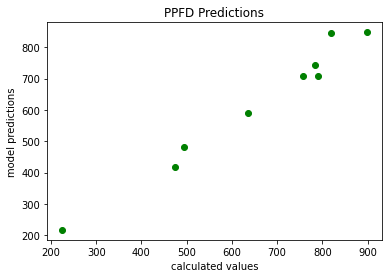

In [60]:
plt.scatter(y_test,y_predict,color='g')
plt.ylabel('model predictions')
plt.xlabel('calculated values')
plt.title('PPFD Predictions')

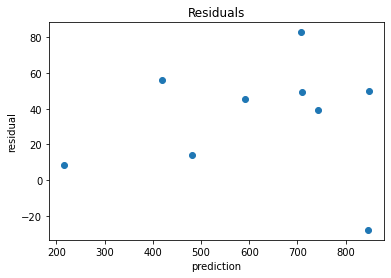

In [61]:
residuals = y_test-y_predict
plt.title('Residuals')
plt.ylabel('residual')
plt.xlabel('prediction')
plt.scatter(y_predict,residuals)

plt.show()

In [63]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
# r2 is the percentage of dependent variable variation that the (linear) model explains. 0% means there is
# no relationship. 100% means a perfect relationship.
r2 = r2_score(y_test,y_predict)
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# It tells you how concentrated the data is around the line of best fit.
# RMSE units is the same as PPFD units, so they are easy to interpret.
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3F'))

print('RMSE = ',RMSE,'\nr2 = ',r2)

RMSE =  46.739 
r2 =  0.9475254801704164


Please send feedback to happyday.github@gmail.com

I have a limited background in pretty much everything discussed within this notebook.  Thus, my observations are naive.  I am looking forward to feedback/guidance on what I did not address correctly, or is there things I can do to improve. Thank you.

## readings_burple_red

### CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [110]:
y = readings_burple_red['PPFD']
y.head()

0    1053
1     976
2    1052
3    1101
4    1103
Name: PPFD, dtype: int64

In [111]:
x = readings_burple_red.iloc[:,1:]
x.head()

,415,445,480,515,555,590,630,680
0,1168,1126,1125,1123,1360,5668,40679,27271
1,1049,1007,1006,1005,1215,5034,36034,24629
2,1002,963,951,953,1152,4562,33352,23542
3,1155,1105,1106,1097,1347,5456,39162,27073
4,1020,989,993,973,1204,4981,35239,23940


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [113]:
print(f"There are {len(x_train)+len(x_test)} total samples. {len(x_train)} samples are in the training set and {len(x_test)} samples are in the test set.")

There are 56 total samples. 44 samples are in the training set and 12 samples are in the test set.


# TRAIN MODEL

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression(fit_intercept=True)

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
print('linear model coefficients (m)',model.coef_)
print('linear model coefficients (b)',model.intercept_)

linear model coefficients (m) [-8.62863297  0.99359928  0.12814529  3.80797453  9.26068063  0.41637372
 -0.0948032  -0.19988212]
linear model coefficients (b) 23.81651571013765


# EVALUATE MODEL

In [72]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[ 647.71632999  426.30374684  595.48085367 1096.52976946  598.04126695
  546.59299054  749.54897912  594.44257012  586.86679991  729.3559244
  785.92817878  661.6785822 ]
13     597
55     459
21     588
3     1101
37     608
38     565
14     705
30     514
11     537
20     716
2     1052
34     698
Name: PPFD, dtype: int64


Text(0.5, 1.0, 'PPFD Predictions')

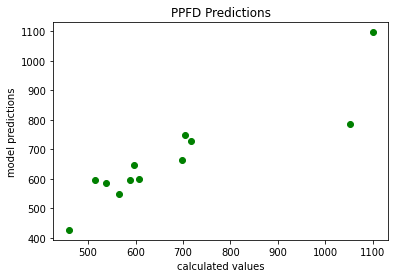

In [73]:
plt.scatter(y_test,y_predict,color='g')
plt.ylabel('model predictions')
plt.xlabel('calculated values')
plt.title('PPFD Predictions')

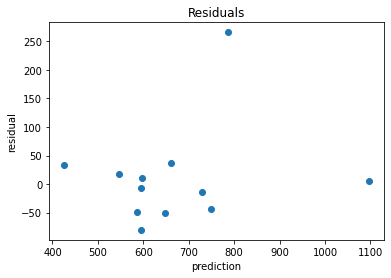

In [74]:
residuals = y_test-y_predict
plt.title('Residuals')
plt.ylabel('residual')
plt.xlabel('prediction')
plt.scatter(y_predict,residuals)

plt.show()

In [76]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
# r2 is the percentage of dependent variable variation that the (linear) model explains. 0% means there is
# no relationship. 100% means a perfect relationship.
r2 = r2_score(y_test,y_predict)
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# It tells you how concentrated the data is around the line of best fit.
# RMSE units is the same as PPFD units, so they are easy to interpret.
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3F'))

print('RMSE = ',RMSE,'\nr2 = ',r2)

RMSE =  85.337 
r2 =  0.8051280467668274
